<a href="https://colab.research.google.com/github/lhwong/airbnb-analytics/blob/main/paidout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"Airbnb insights" typically refers to valuable information and observations derived from data related to Airbnb listings, bookings, and the short-term rental market. These insights can provide hosts, property owners, and stakeholders with a deeper understanding of trends, demand patterns, pricing strategies, and guest preferences. They help hosts make informed decisions to optimize their listings and improve the overall guest experience. Here are some aspects that Airbnb insights might encompass:

Booking Trends: Analyzing data to understand when booking activity is highest and lowest throughout the year. This helps hosts anticipate peak seasons and plan pricing strategies accordingly.

Pricing Strategies: Using historical data to determine optimal pricing for different times of the year, weekdays vs. weekends, special events, and holidays.

Guest Preferences: Identifying common amenities, features, and services that guests value the most. This can help hosts enhance their listings to attract more bookings.

Competitor Analysis: Comparing your listing to similar properties in your area to understand how you can differentiate and stand out.

Reviews and Ratings: Analyzing guest reviews and ratings to identify strengths and weaknesses in your property, as well as aspects that contribute to positive or negative guest experiences.

Cancellation Patterns: Examining cancellation rates and reasons for cancellations to adapt policies and reduce cancellations.

Geographical Insights: Understanding which neighborhoods or areas are most popular among guests, enabling hosts to target their listings more effectively.

Length of Stay: Analyzing how long guests typically stay, which can help with pricing adjustments and availability planning.

Demand Fluctuations: Observing how demand changes over time, such as during holidays, local events, or seasonal shifts.

Booking Lead Time: Understanding how far in advance guests tend to book, allowing hosts to adjust their booking policies and manage availability.

These insights are typically generated by analyzing historical data, user behavior, and market trends. Airbnb provides hosts with some basic insights through its platform, but many hosts also use third-party tools and services to gain more in-depth information.

By leveraging Airbnb insights, hosts and property owners can make strategic decisions to maximize their earning potential, create better guest experiences, and optimize their short-term rental operations.







Total Paid Out Amount:  28308.949999999997
Listing
L    12270.96
R    16037.99
Name: Amount, dtype: float64
Listing  Date
L        4        153.75
         5       2659.01
         6       4125.42
         7       4307.60
         8       1025.18
R        4        474.03
         5       4847.01
         6       5059.28
         7       4490.33
         8       1167.34
Name: Amount, dtype: float64


<Axes: xlabel='Date'>

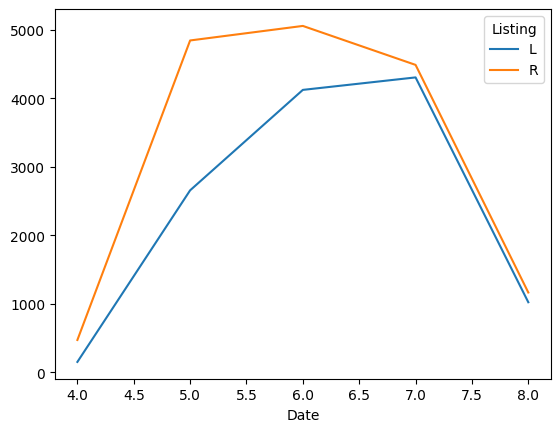

In [ ]:
import pandas as pd
from google.colab import files
import io
import matplotlib.pyplot as plt


#uploaded = files.upload()


#df2 = pd.read_csv(io.BytesIO(uploaded['airbnb_tax_01_2023-08_2023.csv']), parse_dates=['Date', 'Start Date'])

df2 = pd.read_csv('airbnb_tax_01_2023-08_2023.csv', parse_dates=['Date', 'Start Date'])



df2.loc[df2["Listing"] == "Level35 Ceylonz Suites overlooking KLCC, KL Tower", "Listing"] = 'R'
df2.loc[df2["Listing"] == "Level 35 Ceylonz Suites overlooking KLCC, KL Tower", "Listing"] = 'L'

result = df2.loc[df2['Type'] == "Reservation", 'Amount'].sum()

print("Total Paid Out Amount: ",result)



grouped = df2.loc[(df2['Type'] == "Reservation")].groupby('Listing')['Amount'].sum()

print(grouped)

grouped1 = df2.loc[(df2['Type'] == "Reservation")].groupby(['Listing', df2.Date.dt.month])['Amount'].sum()

print(grouped1)

#df2.set_index(df2.Date.dt.month, inplace=True)

#df2.loc[(df2['Type'] == "Reservation")].groupby('Listing')['Amount'].plot(legend=True)




grouped2 = df2.loc[(df2['Type'] == "Reservation")].groupby([df2.Date.dt.month, 'Listing'])['Amount'].sum()
#.unstack().assign(Total=df2.groupby(df2.Date.dt.month).sum()).stack()

#print(grouped2)





#table = pd.pivot_table(df2, values=['Amount'], index=[df2.Date.dt.month,'Listing'], aggfunc = 'sum')
#table

pd.pivot_table(grouped2.reset_index(),
               index='Date', columns='Listing', values='Amount'
              ).plot(legend=True)

In [8]:
import pandas as pd
from google.colab import files
import io
import matplotlib.pyplot as plt
import datetime
from re import sub
from decimal import Decimal

import plotly.express as px

#uploaded = files.upload()


df1 = pd.read_csv('reservations1.csv', parse_dates=['Start date', 'End date', 'Booked'])

df2 = pd.read_csv('reservations2.csv', parse_dates=['Start date', 'End date', 'Booked'])

df3 = pd.read_csv('reservations3.csv', parse_dates=['Start date', 'End date', 'Booked'])

df4 = pd.read_csv('reservations4.csv', parse_dates=['Start date', 'End date', 'Booked'])

df5 = pd.read_csv('reservations5.csv', parse_dates=['Start date', 'End date', 'Booked'])

df6 = pd.read_csv('reservations6.csv', parse_dates=['Start date', 'End date', 'Booked'])

frames  = [df1, df2, df3, df4, df5, df6]
df = pd.concat(frames, ignore_index=True)


df.loc[df["Listing"] == "Level35 Ceylonz Suites overlooking KLCC, KL Tower", "Listing"] = 'R'
df.loc[df["Listing"] == "Level 35 Ceylonz Suites overlooking KLCC, KL Tower", "Listing"] = 'L'



df["Earnings"] = df["Earnings"].apply(lambda x: sub(r'[^\d.]', '', x))

df['Earnings'] = df['Earnings'].astype(float)

#df = dfi[dfi['Earnings'] > 0]
#print(df)
#print(df.head(15))

#earnings = df.groupby([df['Start date'].dt.to_period('M'), 'Listing'])['Earnings'].sum()

#print(earnings)

cols = ['Date', 'Listing', 'Earnings', 'Nights']
lst = []
for ind in range(len(df)):
  for y in range(df['# of nights'][ind]) :
    date = df['Start date'][ind] + datetime.timedelta(days=y)
    lst.append([date, df['Listing'][ind], df['Earnings'][ind]/df['# of nights'][ind],df['# of nights'][ind]])

data = pd.DataFrame(lst, columns=cols)

data = data.loc[(data['Earnings'] > 0)]


d = {}
listing = data["Listing"].unique()
for ind in range(len(listing)):
  l = [];
  f = data.loc[(data["Listing"] == listing[ind])]
  f.reset_index(drop=True, inplace=True)


  for y in range(len(f)) :
    l.append([[f['Date'][y], f['Earnings'][y]]])
  d[listing[ind]] = l

print(d)

dataL = data.loc[(data['Earnings'] > 0) & (data['Listing'] == 'L')]


#with pd.option_context('display.max_rows', None):
#  display(dataL)

dataR = data.loc[(data['Earnings'] > 0) & (data['Listing'] == 'R')]


#with pd.option_context('display.max_rows', None):
#  display(dataR)

data = data.loc[(data['Earnings'] > 0)]

with pd.option_context('display.max_rows', None):
   print(data.head(30))

#earnings = data.groupby([data.Date.dt.to_period('M'), 'Listing'])['Earnings'].sum()
#print(earnings)

#earnings1 = data.groupby(['Date', 'Listing'])['Earnings'].sum()
#with pd.option_context('display.max_rows', None):
#  print(earnings1)

#earningsR = data.loc[(data['Earnings'] > 0) & (data['Listing'] == 'R')].groupby(['Date', 'Listing'])['Earnings'].sum()
#with pd.option_context('display.max_rows', None):
#print(earningsR.head(3))

#earningsL = data.loc[(data['Earnings'] > 0) & (data['Listing'] == 'L')].groupby(['Date', 'Listing'])['Earnings'].sum()
#with pd.option_context('display.max_rows', None):
#print(earningsL.head(3))

meanDate = data.loc[(data['Earnings'] > 0)].groupby(['Date', 'Listing'])['Earnings'].sum()
with pd.option_context('display.max_rows', None):
  print(meanDate.head(3))

mean1 = data.loc[(data['Earnings'] > 0)].groupby([data.Date.dt.to_period('M'), 'Listing'])['Earnings'].mean()
#['Earnings'].mean()
with pd.option_context('display.max_rows', None):
  print(mean1)

meanListing = data.loc[(data['Earnings'] > 0)].groupby(['Listing', 'Nights'])['Nights'].count()
#['Earnings'].mean()
with pd.option_context('display.max_rows', None):
  print(meanListing)

mm = data.loc[(data['Earnings'] > 0)].groupby([data.Date.dt.to_period('M'), 'Listing']).agg({'Earnings': [min,max]})
#['Earnings'].mean()
with pd.option_context('display.max_rows', None):
  print(mm)

#pd.pivot_table(data.reset_index(),
#               index='Date', columns='Listing', values='Earnings'
#              ).plot(legend=True)

#plt.scatter(dataL['Date'], dataL['Earnings'])
#plt.scatter(dataR['Date'], dataR['Earnings'], marker='v', color='r')
#plt.title('Nightly Rate')
#plt.show()



fig = px.scatter(data, x="Date", y="Earnings", color="Listing", trendline="ols")
fig.show()


#for ind in range(len(df)):
#    print(df['Start date'][ind], df['End date'][ind], df['# of nights'][ind])

{'R': [[[Timestamp('2023-04-26 00:00:00'), 105.34]], [[Timestamp('2023-04-27 00:00:00'), 105.34]], [[Timestamp('2023-04-28 00:00:00'), 131.675]], [[Timestamp('2023-04-29 00:00:00'), 131.675]], [[Timestamp('2023-04-30 00:00:00'), 131.68]], [[Timestamp('2023-05-01 00:00:00'), 172.3375]], [[Timestamp('2023-05-02 00:00:00'), 172.3375]], [[Timestamp('2023-05-03 00:00:00'), 172.3375]], [[Timestamp('2023-05-04 00:00:00'), 172.3375]], [[Timestamp('2023-05-05 00:00:00'), 131.68]], [[Timestamp('2023-05-06 00:00:00'), 172.35]], [[Timestamp('2023-05-07 00:00:00'), 139.42]], [[Timestamp('2023-05-08 00:00:00'), 139.42]], [[Timestamp('2023-05-09 00:00:00'), 139.42]], [[Timestamp('2023-05-10 00:00:00'), 134.56]], [[Timestamp('2023-05-11 00:00:00'), 172.34]], [[Timestamp('2023-05-12 00:00:00'), 172.34]], [[Timestamp('2023-05-13 00:00:00'), 139.42]], [[Timestamp('2023-05-14 00:00:00'), 134.56]], [[Timestamp('2023-05-15 00:00:00'), 167.9875]], [[Timestamp('2023-05-16 00:00:00'), 167.9875]], [[Timestamp('

Nightly price 175

Smart pricing average 178

Cleaning fee 30

Total 208

Your earning 175

https://cloud.google.com/appengine/docs/standard/python3/building-app

python -m venv env
.\env\Scripts\activate

pip install -r requirements.txt

python main.py